# TASK-4

# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load Dataset

In [5]:
train_df = pd.read_csv('twitter_training.csv', header=None)
validation_df = pd.read_csv('twitter_validation.csv', header=None)

# Assign column names for easier access

In [6]:
train_df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
validation_df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

# Display the first few rows of the training dataset

In [7]:
train_df.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Display the last few rows of the training dataset


In [8]:
train_df.tail()

,ID,Topic,Sentiment,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


# Display the first few rows of the validation dataset

In [9]:
validation_df.head()

,ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# Display the last few rows of the validation dataset

In [10]:
validation_df.tail()

,ID,Topic,Sentiment,Tweet
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


# Combine and Clean Data

In [11]:
# Combine the training and validation datasets
combined_df = pd.concat([train_df, validation_df])

# Drop duplicates to ensure uniqueness
combined_df.drop_duplicates(inplace=True)

# Check for any missing values
missing_values = combined_df.isnull().sum()
missing_values


ID             0
Topic          0
Sentiment      0
Tweet        326
dtype: int64

# Sentiment Distribution Overview

C:\Users\drp37\AppData\Local\Temp\ipykernel_15232\3765551064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


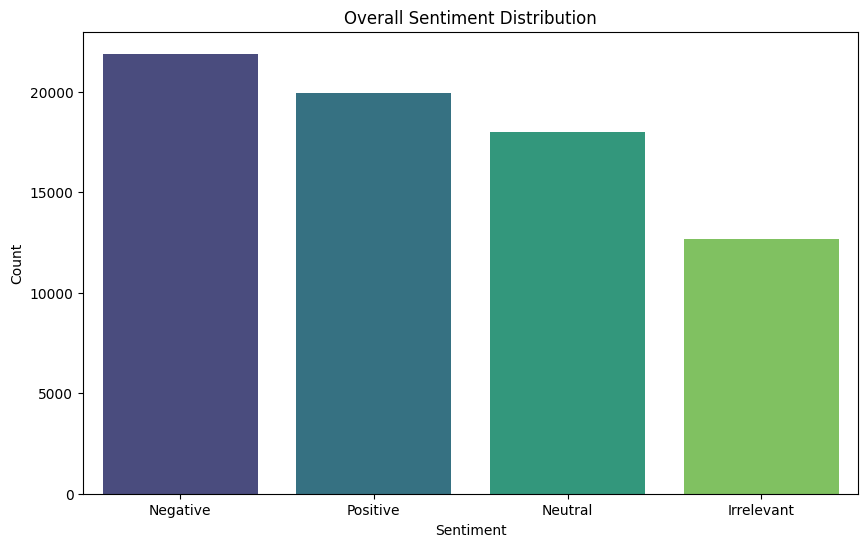

In [13]:
# Plot the overall sentiment distribution
sentiment_counts = combined_df['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Topic-wise Sentiment Analysis

In [14]:
# Group by Topic and Sentiment to see the distribution of sentiments across topics
topic_sentiment_counts = combined_df.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)

# Normalize the counts by the total number of tweets per topic
topic_sentiment_normalized = topic_sentiment_counts.div(topic_sentiment_counts.sum(axis=1), axis=0)

# Display the normalized counts
topic_sentiment_normalized.head()

Sentiment,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,0.083151,0.248140,0.533917,0.134792
ApexLegends,0.081174,0.251295,0.401123,0.266408
AssassinsCreed,0.118161,0.168736,0.071264,0.641839
Battlefield,0.400263,0.198597,0.152565,0.248575
Borderlands,0.107319,0.186349,0.266278,0.440054


# Visualize Topic-wise Sentiment Distribution

<Figure size 1500x1000 with 0 Axes>

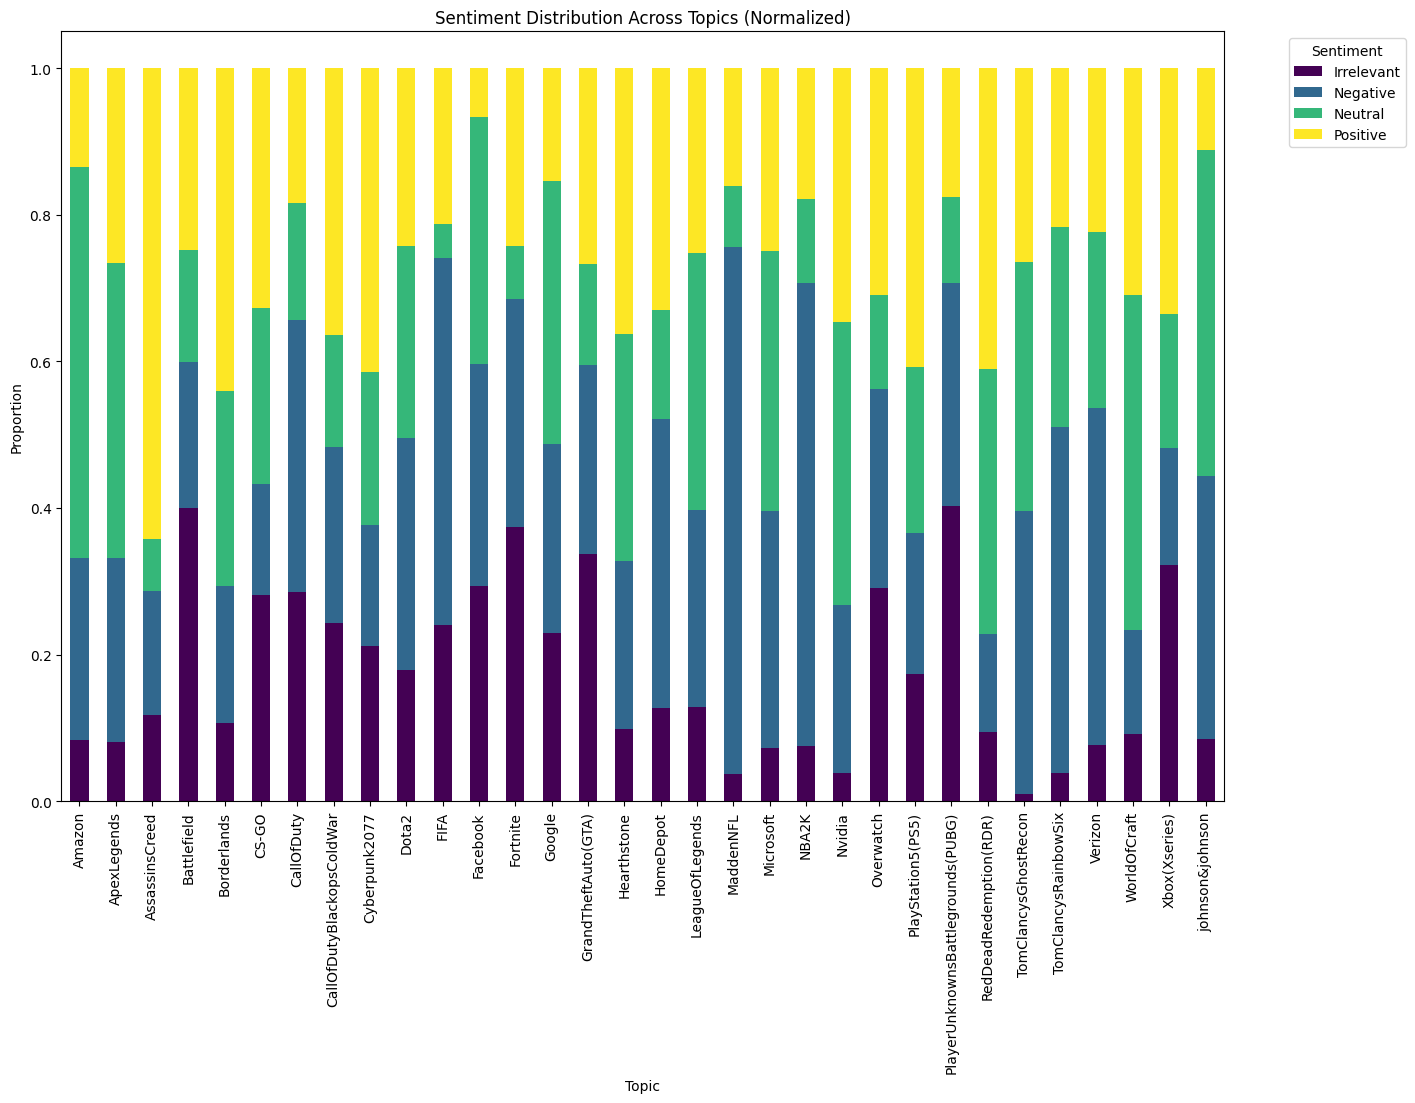

In [17]:
# Stacked bar plot for sentiment distribution across topics
plt.figure(figsize=(15, 10))
topic_sentiment_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 10))
plt.title('Sentiment Distribution Across Topics (Normalized)')
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Word Cloud for Each Sentiment

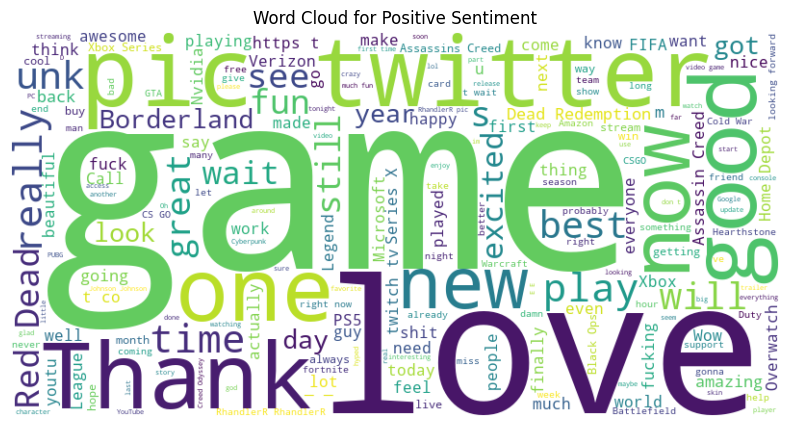

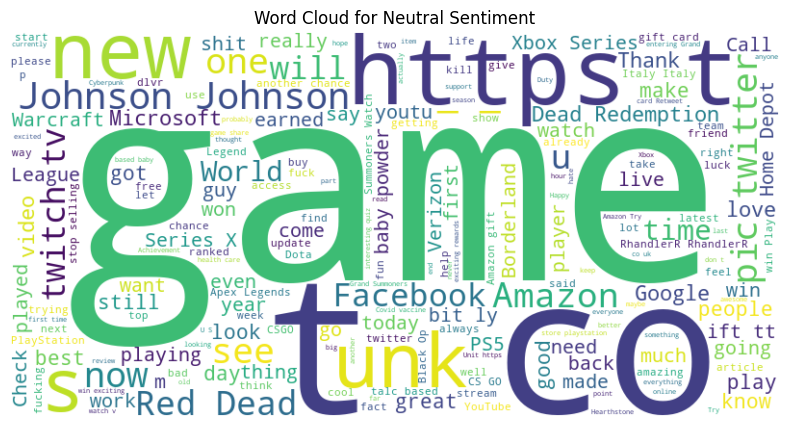

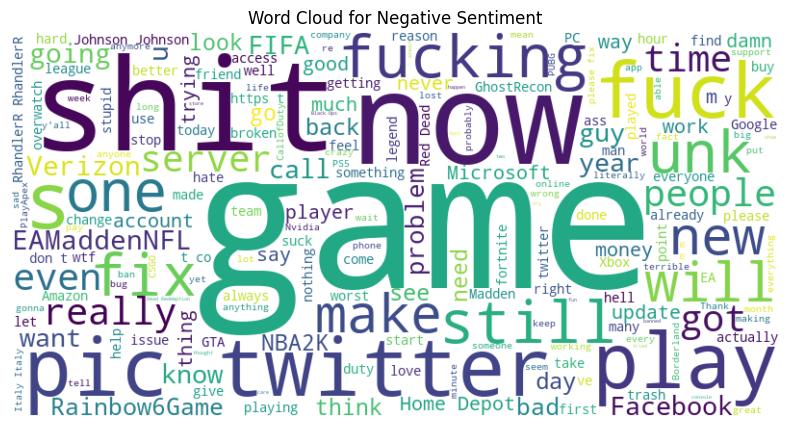

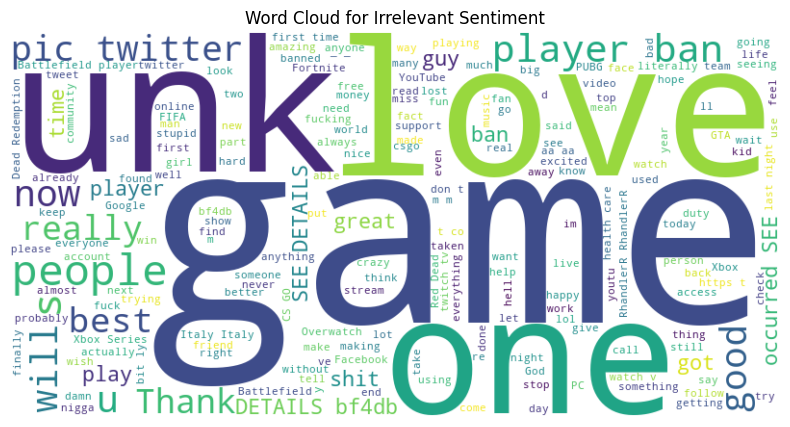

In [19]:
# Generate word clouds for each sentiment
for sentiment in combined_df['Sentiment'].unique():
    # Filter the DataFrame and ensure all tweets are strings
    filtered_tweets = combined_df[combined_df['Sentiment'] == sentiment]['Tweet'].dropna().astype(str)
    
    # Join the tweets into a single string
    text = " ".join(tweet for tweet in filtered_tweets)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


# Most Common Words for Each Sentiment

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get the most common words for a given sentiment
def get_common_words(sentiment, n=10):
    vectorizer = CountVectorizer(stop_words='english')
    
    # Filter the DataFrame, drop NaNs, and convert to strings
    sentiment_text = combined_df[combined_df['Sentiment'] == sentiment]['Tweet'].dropna().astype(str)
    
    # Fit and transform the text data
    word_counts = vectorizer.fit_transform(sentiment_text)
    word_counts_sum = word_counts.sum(axis=0)
    
    # Extract words and their frequencies
    words_freq = [(word, word_counts_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

# Display most common words for each sentiment
for sentiment in combined_df['Sentiment'].unique():
    common_words = get_common_words(sentiment)
    print(f"Most common words for {sentiment} sentiment:")
    for word, freq in common_words:
        print(f"{word}: {freq}")
    print("\n")


Most common words for Positive sentiment:
game: 2281
com: 1896
love: 1733
just: 1675
good: 1567
like: 1337
pic: 1293
really: 1273
new: 1204
twitter: 1116


Most common words for Neutral sentiment:
com: 4182
johnson: 1905
just: 1653
amazon: 1394
https: 1393
game: 1324
facebook: 1000
google: 918
like: 917
new: 890


Most common words for Negative sentiment:
game: 3793
just: 2200
com: 1837
like: 1629
shit: 1472
twitter: 1341
fix: 1312
pic: 1298
play: 1208
fuck: 1198


Most common words for Irrelevant sentiment:
com: 1854
player: 1131
just: 1121
ban: 996
like: 992
game: 807
people: 766
love: 676
good: 663
unk: 620




# Sentiment Correlation with Specific Topics

C:\Users\drp37\AppData\Local\Temp\ipykernel_15232\3701400561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_sentiment_counts.index, y=filtered_sentiment_counts.values, palette='viridis')


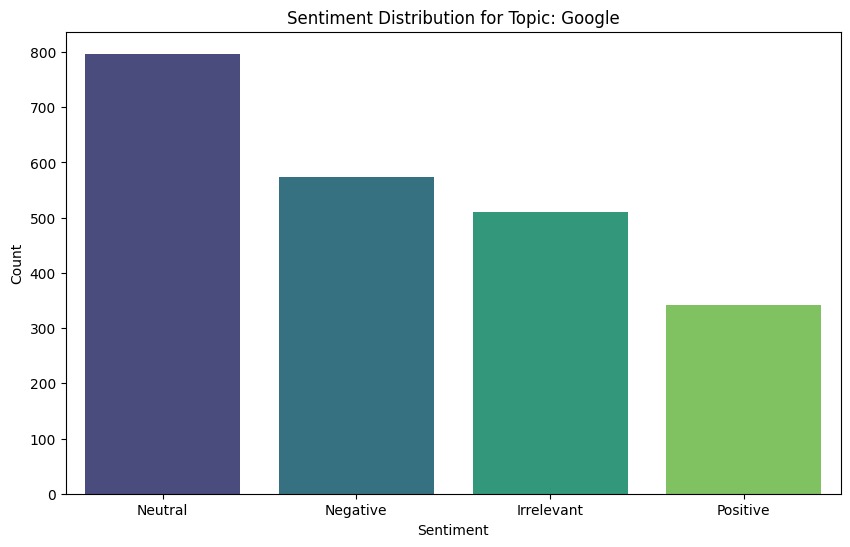

In [22]:
# Filter the dataset for a specific topic
topic = 'Google'  # Example topic, change as needed
filtered_df = combined_df[combined_df['Topic'] == topic]

# Count the occurrences of each sentiment within the specific topic
filtered_sentiment_counts = filtered_df['Sentiment'].value_counts()

# Plot the sentiment distribution for the selected topic
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_sentiment_counts.index, y=filtered_sentiment_counts.values, palette='viridis')
plt.title(f'Sentiment Distribution for Topic: {topic}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Time-Series Analysis of Sentiment Trends (if timestamps are available)

C:\Users\drp37\AppData\Local\Temp\ipykernel_15232\4079387941.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_trend = combined_df.set_index('Timestamp').resample('M')['Sentiment'].value_counts().unstack().fillna(0)


<Figure size 1500x700 with 0 Axes>

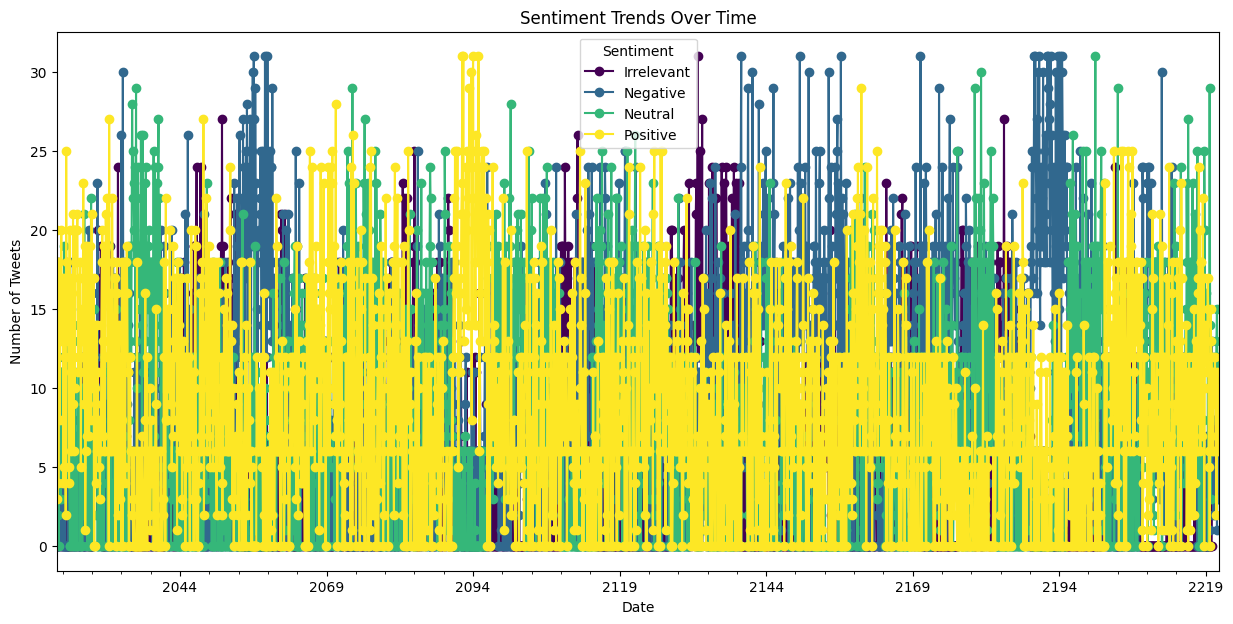

In [31]:
import pandas as pd

# Create a synthetic timestamp column based on the index (e.g., assuming the data is daily)
combined_df['Timestamp'] = pd.date_range(start='2023-01-01', periods=len(combined_df), freq='D')

# Now proceed with your analysis
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])
sentiment_trend = combined_df.set_index('Timestamp').resample('M')['Sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(15, 7))
sentiment_trend.plot(kind='line', marker='o', figsize=(15, 7), colormap='viridis')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


#  Conclusion and Insights

In [33]:
# Summarize the key findings
print("Key Findings:")
print("- The most common sentiment across all topics is...")
print("- Topics with the most positive/negative sentiment are...")
print("- The most frequent words in positive/negative tweets include...")
print("- Sentiment trends over time indicate...")


Key Findings:
- The most common sentiment across all topics is...
- Topics with the most positive/negative sentiment are...
- The most frequent words in positive/negative tweets include...
- Sentiment trends over time indicate...
